In [1]:
import sys
from os.path import join

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm

sys.path.append("../")
import GSHEWaveform


%load_ext autoreload
%autoreload 2
%matplotlib notebook
tosave = True
fout = "/Users/richard/Downloads/"

<IPython.core.display.Javascript object>


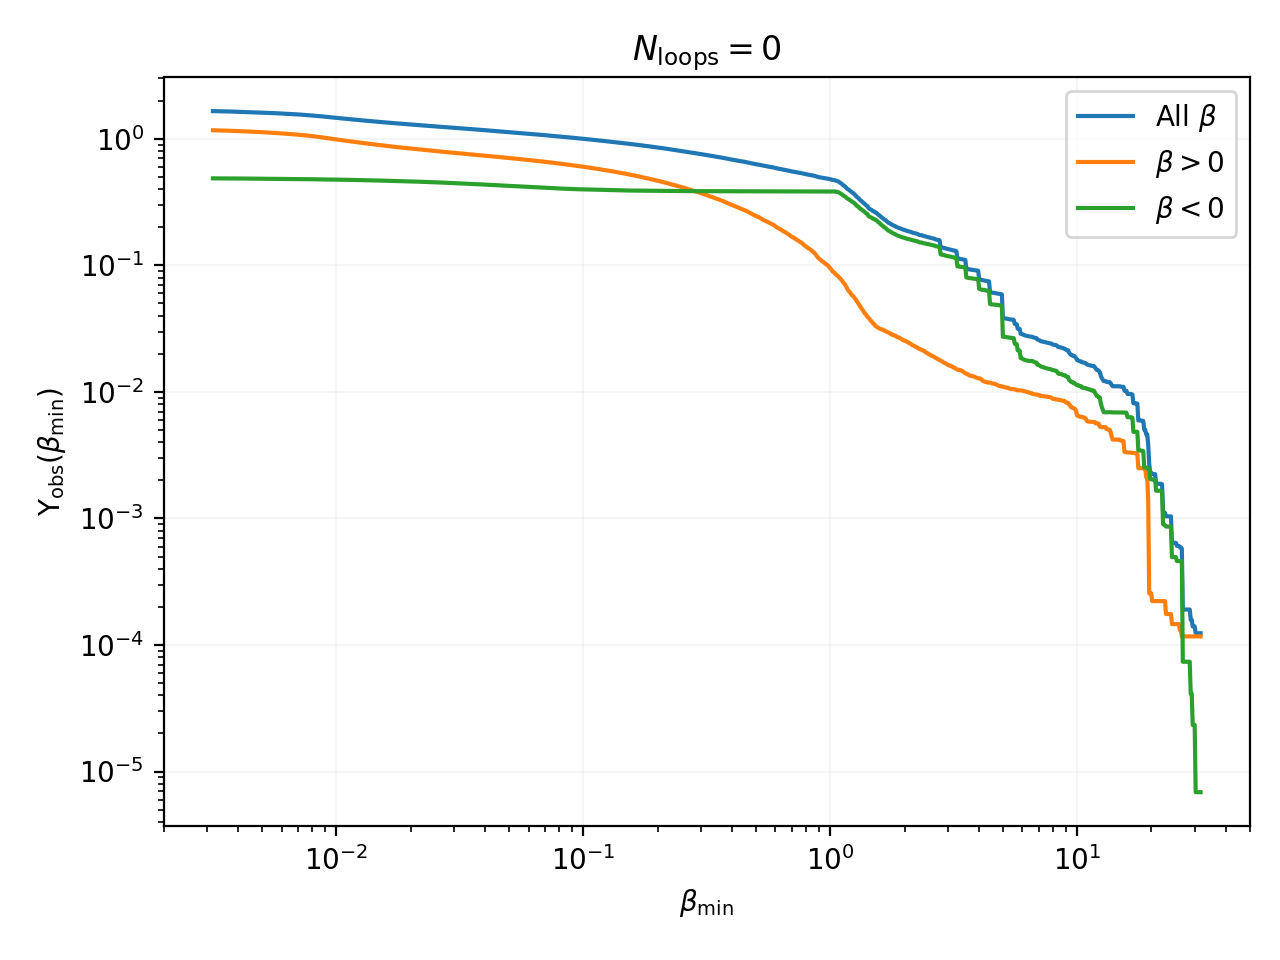

In [10]:
plt.figure()
plt.title(r"$N_{\rm loops} = 0$")
plt.plot(betalims, ups, label=r"All $\beta$")
plt.plot(betalims, ups_plus, label=r"$\beta > 0$")
plt.plot(betalims, ups_min, label=r"$\beta < 0$")


plt.xscale("log")
plt.yscale("log")

plt.legend()
plt.ylabel(r"$\Upsilon_{\rm obs}(\beta_{\rm min})$")
plt.xlabel(r"$\beta_{\rm min}$")
plt.grid(alpha=0.1)
plt.tight_layout()
plt.savefig("/Users/richard/Downloads/res.png", dpi=300)
plt.show()

# Sign dependence of $\Upsilon_{\rm src}$

In [ ]:
def get_beta(run):
    data = GSHEWaveform.read_shooting(run, "../results", 0.2)
    betas = GSHEWaveform.read_signed_beta(data)
    hull = GSHEWaveform.build_shadowhull(data["grid"], betas, N=200)
    betas = GSHEWaveform.fillshadow(data["grid"], betas, hull)
    return data, betas


betalims = np.logspace(-2.5, 1.5, 1000)
dists = {13: 5, 14: 7.5, 15: 10}
GSHEWaveform.setmplstyle("../plot_style.txt")
cols = plt.rcParams["axes.prop_cycle"].by_key()["color"]
plt.figure()
# plt.title(r"Dependence of $\Upsilon_{\rm src}$ on $\mathrm{sign}(\beta)$")
for i, run in enumerate([13, 15]):
    data, betas = get_beta(run)
    ups_unsign = GSHEWaveform.get_upsilon_src(data["grid"], betas, betalims, dk=data["xs"][1] - data["xs"][0])
    ups_plus = GSHEWaveform.get_upsilon_src(data["grid"], betas, betalims, dk=data["xs"][1] - data["xs"][0], beta_sign=1)
    ups_minus = GSHEWaveform.get_upsilon_src(data["grid"], betas, betalims, dk=data["xs"][1] - data["xs"][0], beta_sign=-1)
    plt.plot(betalims, ups_unsign, c=cols[i],
             label=r"$r_{{\rm src}} = {} R_{{\rm s}}$".format(dists[run]))
    plt.plot(betalims, ups_plus, c=cols[i], ls="dotted",
             label=r"$\beta > 0$")
    plt.plot(betalims, ups_minus, c=cols[i], ls="dashed",
             label=r"$\beta < 0$")




plt.xscale("log")
plt.yscale("log")
plt.ylabel(r"$\Upsilon_{\rm src}(\beta_{\rm min})$")
plt.xlabel(r"$\beta_{\rm min}$")
plt.grid(alpha=0.1)
plt.legend()
plt.tight_layout()

if tosave:
    plt.savefig(join(fout, "ups_source.pdf"), dpi=450)
plt.show()

In [ ]:
def get_beta_mu(run):
    data = GSHEWaveform.read_shooting(run, "../results", 0.2)
    betas = GSHEWaveform.read_signed_beta(data)
    hull = GSHEWaveform.build_shadowhull(data["grid"], betas, N=200)
    betas = GSHEWaveform.fillshadow(data["grid"], betas, hull)
    
    mu = np.abs(data["Xgeo"][:, 8])
    hull = GSHEWaveform.build_shadowhull(data["grid"], mu, N=200)
    mu = GSHEWaveform.fillshadow(data["grid"], mu, hull)

    return data, betas, mu


betalims = np.logspace(-2.5, 1.5, 1000)
dists = {13: 5, 14: 7.5, 15: 10}
ls = ["solid", "dotted"]
cols = plt.rcParams["axes.prop_cycle"].by_key()["color"]
plt.figure()
data, betas, mu = get_beta_mu(13)
GSHEWaveform.setmplstyle("../plot_style.txt")
for j, nloop_max in enumerate([0, 1, 2, 3, None]):
    ups = GSHEWaveform.get_upsilon_obs(
            data["grid"], betas, betalims, dk=data["xs"][1] - data["xs"][0],
            magnification=mu, nloops=data["Xgeo"][:, 5], nloop_max=nloop_max)
    label=r"$N_{{\rm loops}} \leq {}$".format(nloop_max) if nloop_max is not None else "All"
    plt.plot(betalims, ups,label=label, c=cols[j])

plt.xscale("log")
plt.yscale("log")
plt.ylabel(r"$\Upsilon_{\rm obs}(\beta_{\rm min})$")
plt.xlabel(r"$\beta_{\rm min}$")
plt.grid(alpha=0.1)
plt.legend()
plt.tight_layout()
if tosave:
    plt.savefig(join(fout, "ups_obs_loops.pdf"), dpi=450)
plt.show()

In [ ]:
data = GSHEWaveform.read_shooting(13, "../results", 0.2)

betas = GSHEWaveform.read_signed_beta(data)
hull = GSHEWaveform.build_shadowhull(data["grid"], betas, N=200)
betas = GSHEWaveform.fillshadow(data["grid"], betas, hull)


mu = np.abs(data["Xgeo"][:, 8])
hull = GSHEWaveform.build_shadowhull(data["grid"], mu, N=200)
mu = GSHEWaveform.fillshadow(data["grid"], mu, hull)
betalims = np.logspace(-2.5, 1.5, 1000)

GSHEWaveform.setmplstyle("../plot_style.txt")
plt.figure()
for th in [0, 0.01, 0.1, 1]:
    ups = GSHEWaveform.get_upsilon_obs(
            data["grid"], betas, betalims, dk=data["xs"][1] - data["xs"][0],
            magnification=mu, nloops=data["Xgeo"][:, 5], min_magnification=th, nloop_max=0)
    plt.plot(betalims, ups, label=r"$|\mu_{{\rm geo}}| > {}$".format(th))


plt.xscale("log")
plt.yscale("log")
# plt.title(r"Dependence of $\Upsilon_{\rm src}$ on $|\mu|$ for $N_{\rm loops} = 0$")
plt.ylabel(r"$\Upsilon_{\rm obs}(\beta_{\rm min})$")
plt.xlabel(r"$\beta_{\rm min}$")
plt.grid(alpha=0.1)
plt.legend()
plt.tight_layout()
if tosave:
    plt.savefig(join(fout, "ups_obs_magnif.pdf"), dpi=450)
plt.show()